# Mask PolScope images with radiometry

In [9]:
import os
import numpy as np
import tifffile
import matplotlib.pyplot as plt
from utils import load_images, save_image, display_image, display_image_with_mla_grid

In [2]:
lf_final_dir = os.path.join('data', 'lf_processed_final')
complete_dir = os.path.join(lf_final_dir, 'complete')
masked_dir = os.path.join(lf_final_dir, 'masked')
radiometry_filename = os.path.join(lf_final_dir, 'radiometry_rectified.tif')

In [3]:
images = load_images(complete_dir)

### Look at zoomed section of image

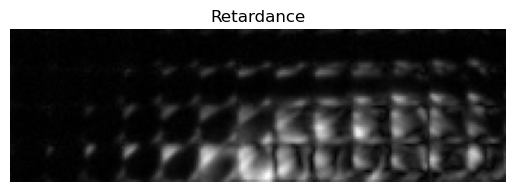

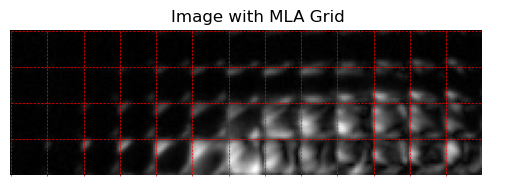

In [14]:
cropped_image = images[0][16*16:16*20, 16*12:16*25]
display_image(cropped_image, 'Retardance')
display_image_with_mla_grid(cropped_image, 16)

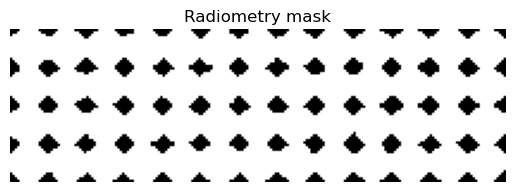

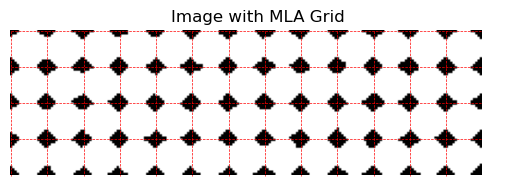

In [13]:
mask = tifffile.imread(radiometry_filename)
mask_cropped = mask[16*16:16*20, 16*12:16*25]
display_image(mask_cropped, 'Radiometry mask')
display_image_with_mla_grid(mask_cropped, 16)

## Mask images

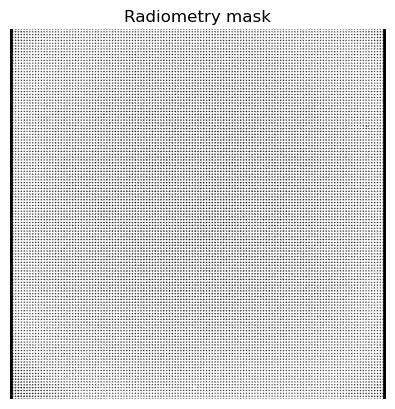

In [10]:
mask = tifffile.imread(radiometry_filename)
display_image(mask, 'Radiometry mask')

In [20]:
def apply_mask_to_images(image_arrays, mask_path):
    """
    Apply a mask to a list of NumPy arrays representing images.
    Args:
        image_arrays (list of np.array): List of image arrays to which
            the mask will be applied.
        mask_path (str): Path to the TIF file containing the mask.
    Returns:
        list of np.array: List of masked image arrays.
    """
    mask = tifffile.imread(mask_path)
    mask = mask > 0 # Ensure the mask is boolean
    masked_images = [np.where(mask, image, 0) for image in image_arrays]
    return masked_images

In [22]:
masked_images = apply_mask_to_images(images, radiometry_filename)

### Plot (cropped) masked images

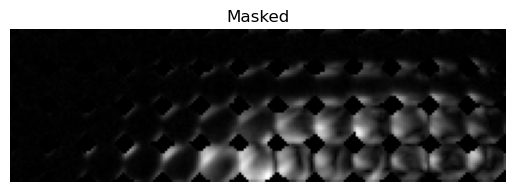

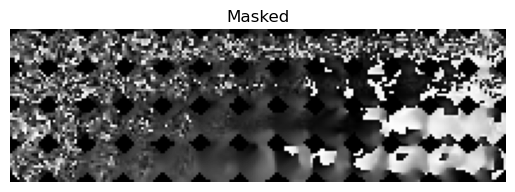

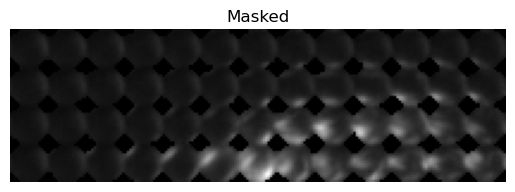

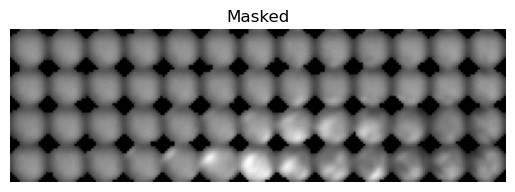

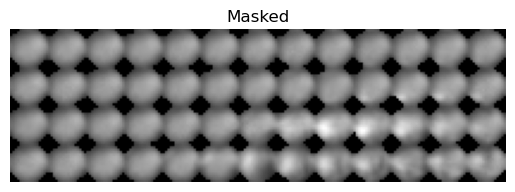

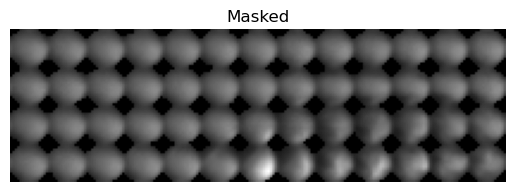

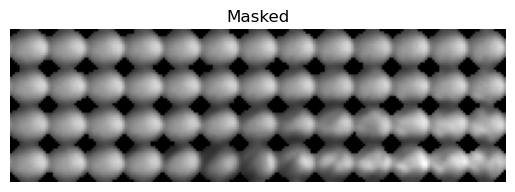

In [24]:
for image in masked_images:
    cropped_image = image[16*16:16*20, 16*12:16*25]
    display_image(cropped_image, 'Masked')

### Save masked images

In [25]:
masked_img_filenames = [
    'retardance_masked.tif',
    'azimuth_masked.tif',
    'state0_masked.tif',
    'state1_masked.tif',
    'state2_masked.tif',
    'state3_masked.tif',
    'state4_masked.tif'
]

In [38]:
masked_img_paths = [os.path.join(masked_dir, filename) for filename in masked_img_filenames]

In [39]:
for idx, image in enumerate(masked_images):
    save_image(masked_img_paths[idx], image)